In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', '{:.1f}'.format)

In [4]:
df = pd.read_csv('../data/heart.csv')

In [5]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [12]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.0,918.0,918.0,918.0,918.0,918.0,918.0
mean,53.5,132.4,198.8,0.2,136.8,0.9,0.6
std,9.4,18.5,109.4,0.4,25.5,1.1,0.5
min,28.0,0.0,0.0,0.0,60.0,-2.6,0.0
25%,47.0,120.0,173.2,0.0,120.0,0.0,0.0
50%,54.0,130.0,223.0,0.0,138.0,0.6,1.0
75%,60.0,140.0,267.0,0.0,156.0,1.5,1.0
max,77.0,200.0,603.0,1.0,202.0,6.2,1.0


In [14]:
df.shape

(918, 12)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [30]:
# unique values of categorical features
print(df["Sex"].unique())
print(df["ExerciseAngina"].unique())
print(df["ChestPainType"].unique())
print(df["RestingECG"].unique())
print(df["ST_Slope"].unique())
# print(df["FastingBS"].unique())
# print(df["HeartDisease"].unique())

['M' 'F']
['N' 'Y']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['Up' 'Flat' 'Down']


<Axes: >

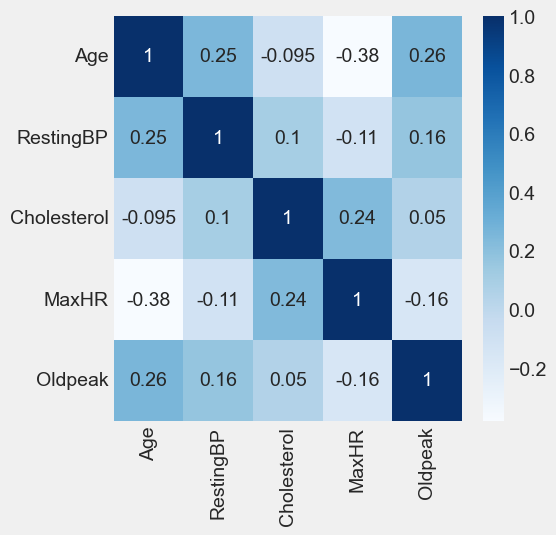

In [25]:
# heatmap for clear image of correlation
numerical_columns = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
# df[numerical_columns].corr()

plt.figure(figsize = (5, 5))
sns.heatmap(df[numerical_columns].corr(), annot = True, cbar = True, cmap = "Blues")

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

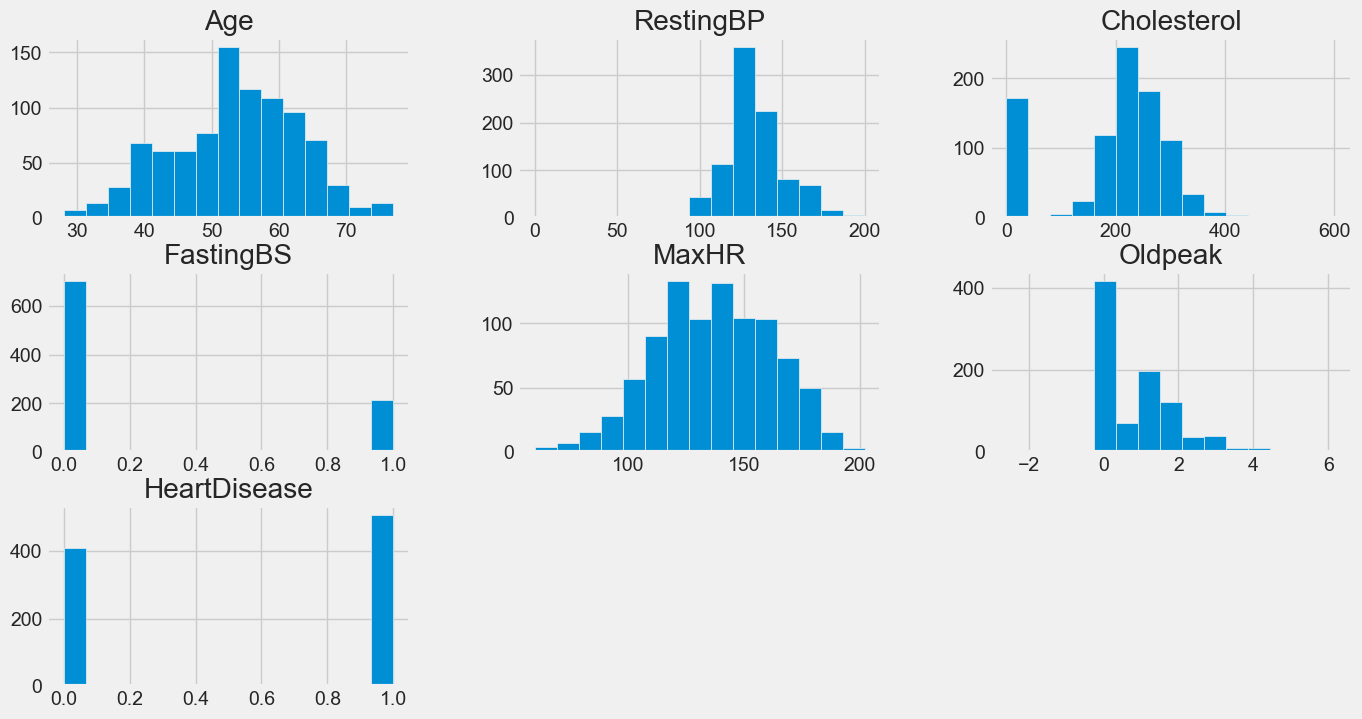

In [26]:
# histograms for all the data
df.hist(bins = 15, figsize = (15, 8))

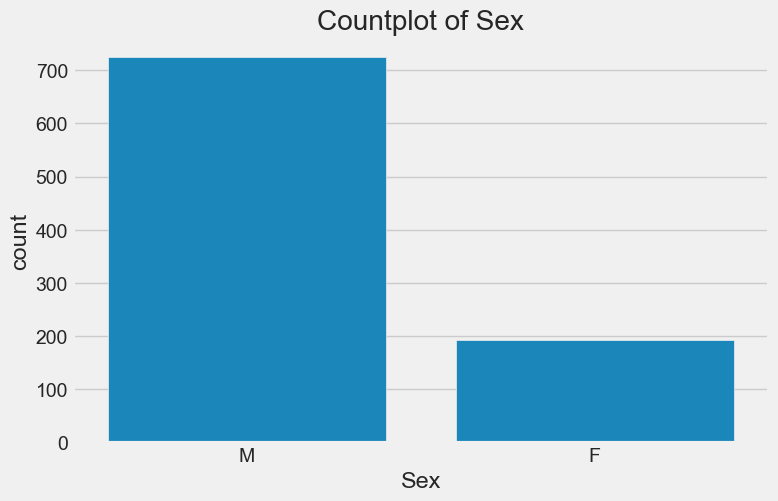

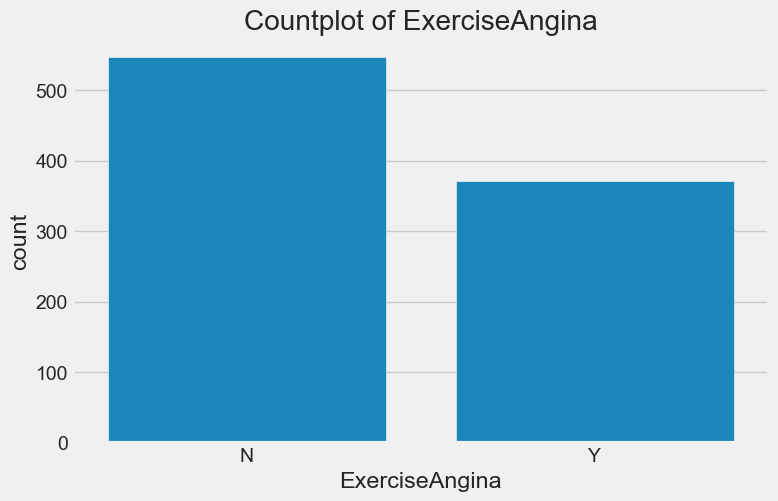

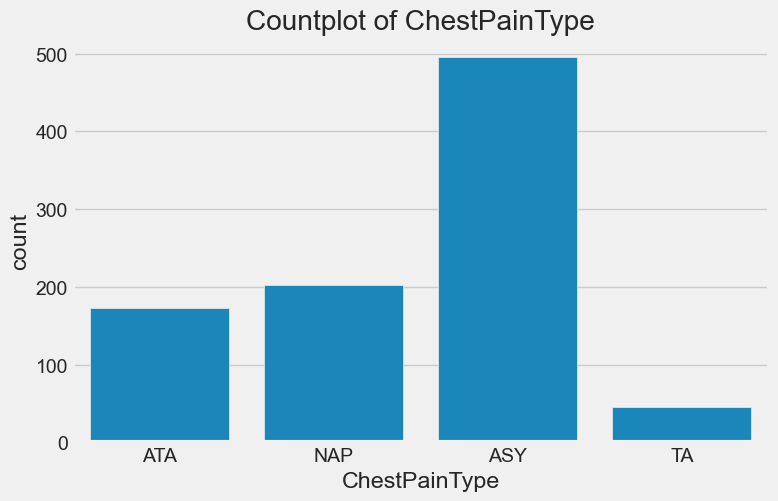

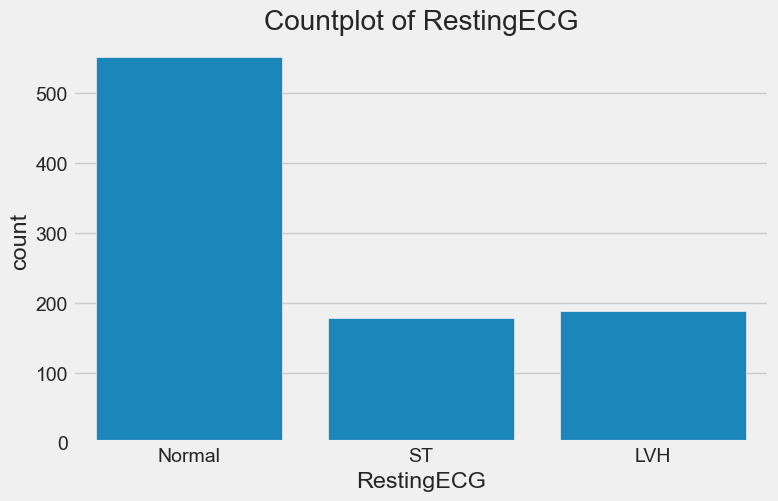

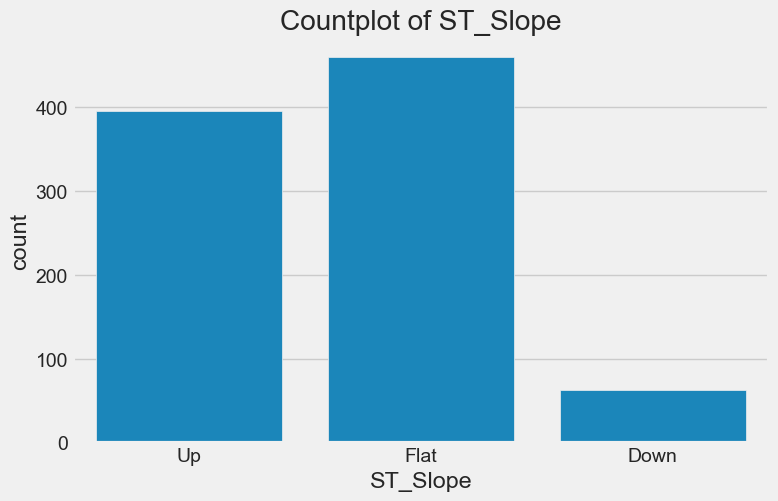

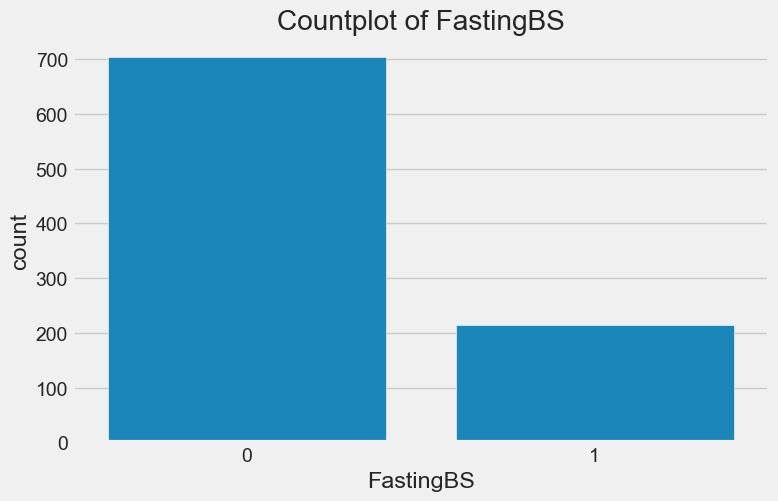

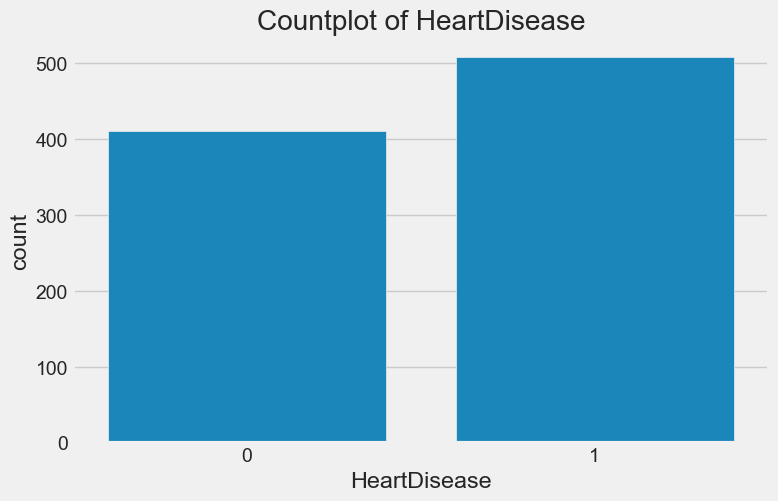

In [27]:
# countplots for categorical columns
categorical_columns = ["Sex", "ExerciseAngina", "ChestPainType", "RestingECG", "ST_Slope", "FastingBS", "HeartDisease"]
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    plt.show()

Text(37.20833333333333, 0.5, 'Cholesterol')

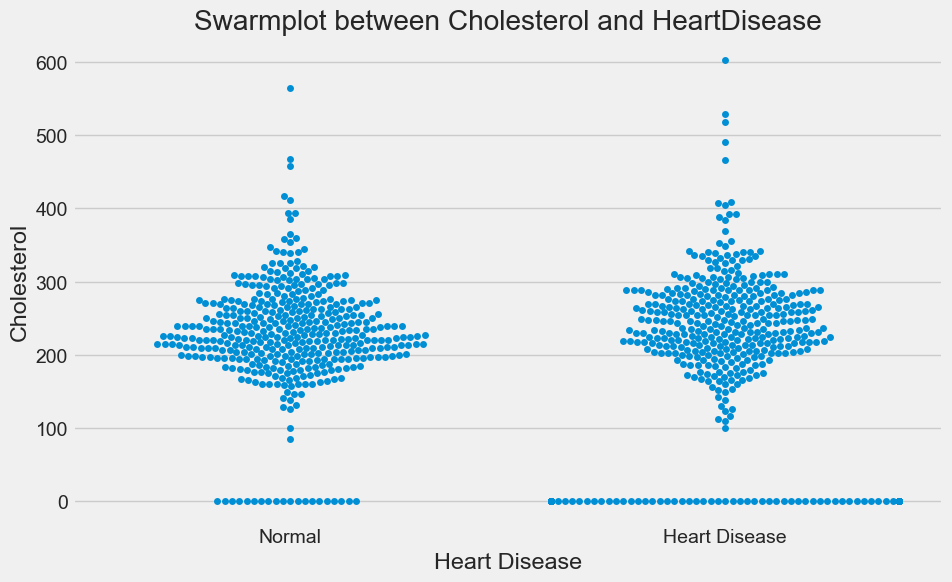

In [29]:
#create the swarm plot
plt.figure(figsize = (10, 6))
sns.swarmplot(x = 'HeartDisease', y = 'Cholesterol', data = df)

#customize the x-axis labels
plt.xticks([0, 1], ['Normal', 'Heart Disease'])

#add title and labels
plt.title('Swarmplot between Cholesterol and HeartDisease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')